# Ec 143 - Problem Set 1
# Demand estimation and instrumental variables
Due by 5PM on February 7th. The GSI, Mengsi Gao (mengsi.gao@berkeley.edu) will handle the logistics of problem set collection.    

Working with peers on the problem set is actively encourage, but everyone needs to turn in their own Jupyter Notebook and any other accompanying materials.    

This problem set reviews the material on supply and demand models, excise taxation and the method of instrumental variables developed in lecture.

In [1]:
# Load libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

The datafiles needed to complete this problem set are available on the course GitHub repository.

In [11]:
data = '/Users/bgraham/Dropbox/Teaching/Berkeley_Courses/Ec143/Ec143_Spring2022/Datasets/'
graphics = '/Users/bgraham/Dropbox/Teaching/Berkeley_Courses/Ec143/Ec143_Spring2022/Graphics/'

## Part 1: Understanding equilibrium price and quantity data

The basic setting is as described in lecture. In each of $ i = 1 \ldots N$ markets we observe the market-clearing price and quantity pair $ (P_i, Q_i). $ The demand schedule in market $i$ is given by

$$ \ln Q_i^d(p) = \alpha_{d0} + \beta_{d0} \ln p + U_{di}, $$

while the corresponding supply schedule is

$$ \ln Q_i^s(p) = \alpha_{s0} + \beta_{s0} \ln p + U_{si}. $$

Marking clearing implies that

$$ Q_i = Q_i^d(P_i) = Q_i^s(P_i). $$

Here $U_{di}$ is a market-specific demand shock and $U_{si}$ a market-specific supply shock. We assume that the supply and demand schedules are otherwise homogenous across markets.    

Depending on the application, "markets" might be different cities (e.g., orange sales in 2021 across a sample of US cities) or perhaps different time periods within the same geographic region (e.g., monthly orange sales in Northern California from January 2010 to December 2021).    

Solving for the (log of) the market-clearing price, $\ln P_i$, yields

$$ \ln P_i = -\frac{\alpha_{s0}-\alpha_{d0}}{\beta_{s0}-\beta_{d0}} -\frac{U_{si}-U_{di}}{\beta_{s0}-\beta_{d0}}. $$

To get the corresponding market clearing (log-) quantity, $\ln Q_i$, we can substitute this expression for $\ln P_i$ into either the demand or supply schedule given above.   

Observe how the market-clearing prince depends on the demand and supply elasiticies, $\beta_{d0}$ and  $\beta_{s0}$, as well as the magnitudes of the supply and demand shocks, respectively $U_{di}$ and $U_{si}$. 

### Simulating a simple demand and supply system
The next block of code simulates $N = 100$ pairs $(\ln P_i, \ln Q_i)$ for the system outlined above. The demand and supply shocks are independently distributed mean zero normal random variables. Other parameters are as specified in the code block.


Three cases are considered. First, a setting where the variances of the demand and supply shocks are equal. Second, a setting where the variance of the demand shocks is small relative to that of the supply shocks. Third, the opposite case where the variance of the supply shocks is small relative to that of the demand shocks.

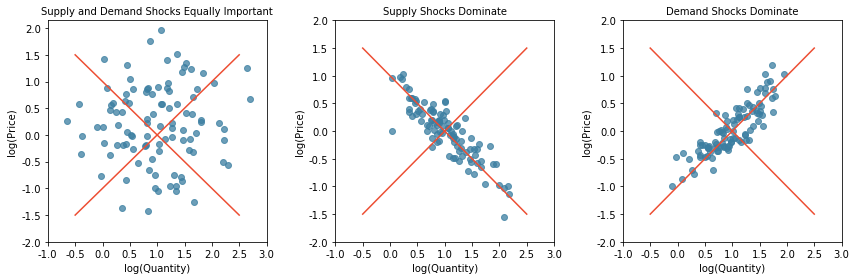

In [3]:
N = 100             # Number of markets to simulate

alpha_d =  1        # Demand and supply schedule parameters
beta_d  = -1
alpha_s =  1
beta_s  =  1

# Define figure object with three subplots
fig_supply_demand, sbp = plt.subplots(ncols=3, figsize=(12, 4))
ax0 = sbp[0] # Handle for left subplot
ax1 = sbp[1] # Handle for middle subplot
ax2 = sbp[2] # Handle for right subplot

#------------------------------------------------------#
#- CASE 1: SUPPLY AND DEMAND SHOCKS EQUALLY IMPORTANT -# 
#------------------------------------------------------#

plt.axes(ax0) # Select first subplot

# Simulate market clearing price quantity pairs for *Case 1*
U_d = np.random.normal(loc=0.0, scale=1.0, size=(N,))
U_s = np.random.normal(loc=0.0, scale=1.0, size=(N,))

logP = -(alpha_s-alpha_d)/(beta_s - beta_d) - (U_s - U_d)/(beta_s - beta_d)
logQ = alpha_s + beta_s*logP + U_s

# Draw scatter plot and underlying supply and demand schedules
ax0.scatter(logQ , logP, color = '#3B7EA1', alpha = 0.75)
plt.plot((alpha_s + beta_s*-1.5, alpha_s + beta_s*1.5), (-1.5, 1.5), color='#ED4E33')
plt.plot((alpha_d + beta_d*-1.5, alpha_d + beta_d*1.5), (-1.5, 1.5), color='#ED4E33')

ax0.set_title('Supply and Demand Shocks Equally Important', fontsize=10)
ax0.set_xlabel(r'log(Quantity)')
ax0.set_ylabel(r'log(Price)')
ax0.set_xticks([-1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3])
ax0.set_xticklabels(['-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0'])
ax0.set_yticks([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])
ax0.set_yticklabels(['-2.0', '-1.5', '-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0'])

#------------------------------------------------------#
#- CASE 2: SUPPLY SHOCKS DOMINATE                     -# 
#------------------------------------------------------#

plt.axes(ax1) # Select second subplot

# Simulate market clearing price quantity pairs for *Case 2*
U_d = np.random.normal(loc=0.0, scale=0.25, size=(N,))
U_s = np.random.normal(loc=0.0, scale=1.0, size=(N,))

logP = -(alpha_s-alpha_d)/(beta_s - beta_d) - (U_s - U_d)/(beta_s - beta_d)
logQ = alpha_s + beta_s*logP + U_s

# Draw scatter plot and underlying supply and demand schedules
ax1.scatter(logQ , logP, color = '#3B7EA1', alpha = 0.75)
plt.plot((alpha_s + beta_s*-1.5, alpha_s + beta_s*1.5), (-1.5, 1.5), color='#ED4E33')
plt.plot((alpha_d + beta_d*-1.5, alpha_d + beta_d*1.5), (-1.5, 1.5), color='#ED4E33')

ax1.set_title('Supply Shocks Dominate', fontsize=10)
ax1.set_xlabel(r'log(Quantity)')
ax1.set_ylabel(r'log(Price)')
ax1.set_xticks([-1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3])
ax1.set_xticklabels(['-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0'])
ax1.set_yticks([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])
ax1.set_yticklabels(['-2.0', '-1.5', '-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0'])

#------------------------------------------------------#
#- CASE 3: DEMAND SHOCKS DOMINATE                     -# 
#------------------------------------------------------#

plt.axes(ax2) # Select third subplot

# Simulate market clearing price quantity pairs for *Case 3*
U_d = np.random.normal(loc=0.0, scale=1.0, size=(N,))
U_s = np.random.normal(loc=0.0, scale=0.25, size=(N,))

logP = -(alpha_s-alpha_d)/(beta_s - beta_d) - (U_s - U_d)/(beta_s - beta_d)
logQ = alpha_s + beta_s*logP + U_s

# Draw scatter plot and underlying supply and demand schedules
ax2.scatter(logQ , logP, color = '#3B7EA1', alpha = 0.75)
plt.plot((alpha_s + beta_s*-1.5, alpha_s + beta_s*1.5), (-1.5, 1.5), color='#ED4E33')
plt.plot((alpha_d + beta_d*-1.5, alpha_d + beta_d*1.5), (-1.5, 1.5), color='#ED4E33')

ax2.set_title('Demand Shocks Dominate', fontsize=10)
ax2.set_xlabel(r'log(Quantity)')
ax2.set_ylabel(r'log(Price)')
ax2.set_xticks([-1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3])
ax2.set_xticklabels(['-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0'])
ax2.set_yticks([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])
ax2.set_yticklabels(['-2.0', '-1.5', '-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0'])

fig_supply_demand.tight_layout()  
plt.savefig(graphics + 'fig_supply_demand', bbox_inches='tight', dpi=500) 

### Commentary
Provide a short description of the main components of the code block above and how they collectively produce the three figures. Next discuss the figures themselves. What implications do these simulations have for understanding the structure of demand and supply in real world settings? Can you think of possible real world markets which might be qualitatively similar to each of the three simulated cases? Please place you answer in a separate markdown box immediately below this one.

### Understanding the properties of OLS when prices are endogenous
Solve for the probability limit of the coefficient on $\ln P_i$ in the OLS fit of $\ln Q_i$ onto a constant and $\ln P_i$. Outline a set of conditions under which:

$$ \hat{\beta} \approx \beta_{d0}. $$

A second set of conditions where

$$ \hat{\beta} \approx \beta_{s0}. $$

Finally a set of conditions where

$$ \hat{\beta} \approx \frac{\beta_{d0} + \beta_{s0}}{2}. $$

In light of your answers, revist the three figures discussed earlier.    

If you know how to write in LaTex you may place your answers in a markdown box immediately below this one. If you do not know LaTex, you may handwrite your answers for this question neatly and turn them in to the GSI.

### Excise Taxes
Assume the demand and supply system outlined above characterizes the market for automobile gasoline across US metropolitan areas. In this example the "price" corresponds to the price of a gallon of gasoline, and the "quantity" to the total number of gallons sold in a market. To be concrete a "market" might be the San Francisco Bay Area in the first quarter of 2022.    

Answer the following questions in a markdown box immediately below this one. If you do not know LaTex, you may handwrite your answers for this question neatly and turn them in to the GSI.   
1. Explain how knowledge of $\beta_{d0}$ and $\beta_{s0}$ could be used to predict the likely equilibrium price and quantity effects of an increase in the gasoline excise tax (to learn more about the gasoline excise tax consult the 2009 Congressional Research Services report _The Role of Federal Gasoline Excise Taxes in Public Policy_ by Robert Pirog (available online at https://crsreports.congress.gov/).   
2. When is the burden of an excise tax primarily bourne by consumers? By producers?    
3. List two possible benefits of a gasoline excise tax? List two possible downsides.

## Part 2: Estimating the price elasticity of demand by the method of instrumental variables
The next block of code loads a sample of records from the 2001 National Household Travel Survey (NHTS). This is sample was used by Richard Blundell, Joel L. Horowitz and Matthias Parey in their 2012 _Quantitative Economics_ paper "Measuring the price responsiveness of gasoline demand: economic shape restrictions and nonparametric demand estimation" (available online at https://qeconomics.org/). Only a subset of the data used in their paper is included in the file below. This is because NHTS survey data for households in small states is not released for confidentiality reasons. The sample below includes data from the 34 largest states in the US.

In [4]:
gas = pd.read_csv (data + 'Blundell_etal_QE2012_gasoline_demand_data.csv')
gas[0:5]

,log_q,log_p,log_y,share,log_hhsize,log_driver,log_hhr_age,total_wrkr,publictransit_d,cl5_smtown_d,...,cl5_urban_d,popdensity_d2,popdensity_d3,popdensity_d4,popdensity_d5,popdensity_d6,popdensity_d7,popdensity_d8,state_fips,distance_oil1000
0,8.143545,0.229807,9.433484,0.346410,1.609438,1.386294,3.465736,3,0,0,...,0,0,0,1,0,0,0,0,1,0.657088
1,8.034972,0.229909,11.119883,0.057556,1.098612,0.693147,3.610918,1,0,0,...,0,0,0,0,1,0,0,0,1,0.657088
2,7.608235,0.229826,10.768485,0.053374,1.098612,0.693147,3.258097,2,0,1,...,0,0,1,0,0,0,0,0,1,0.657088
3,7.452868,0.229807,11.695247,0.018087,1.098612,0.693147,3.465736,2,0,1,...,0,1,0,0,0,0,0,0,1,0.657088
4,7.807454,0.229786,11.695247,0.025784,1.386294,1.098612,3.931826,2,0,1,...,0,1,0,0,0,0,0,0,1,0.657088


The next block of code imports a concordance of state FIPS (Federal Information Processing Standard) codes to state names and postal code abbrevations.

In [5]:
fips = pd.read_csv (data + 'State_Fips_Codes.csv')
fips[0:5]

,Name,Postal_Code,state_fips
0,Alabama,AL,1
1,Alaska,AK,2
2,Arizona,AZ,4
3,Arkansas,AR,5
4,California,CA,6


Next we merge the fips data with the household-level data.

In [6]:
gas=gas.merge(fips, left_on='state_fips', right_on='state_fips')

Blundell and co-authors include the variable _distance_oil1000_ in their dataset. In measures the distance, in thousands of kilometers, from the Gulf of Mexico oil ports to the capital of the state in which the NHTS-sampled household resides.    

The following block of code computes average log gas prices at the state-level.

In [7]:
state = gas[['log_p','distance_oil1000','Postal_Code']].groupby('Postal_Code').mean()
state[0:5] 

,log_p,distance_oil1000
Postal_Code,,
AL,0.229750,0.657088
AR,0.250454,0.785453
AZ,0.300250,2.140950
CA,0.361413,2.863726
CO,0.376864,1.853738


Next we plot the avergae log gas price as a function of distance to the Gulf of Mexico.

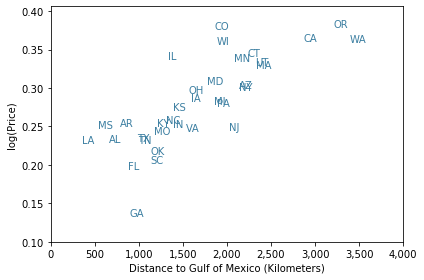

In [8]:
# Plot aggregate firm-to-firm sales by year
fig_gas_price_X_gulf_distance, ax = plt.subplots()

color = '#3B7EA1'                                                                        # Founder's Rock
ax.set_xlabel(r'Distance to Gulf of Mexico (Kilometers)')
ax.set_ylabel(r'log(Price)')
s = ax.scatter(state['distance_oil1000'], state['log_p'], alpha = 0)

ax.tick_params(axis='y')
ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4])
ax.set_xticklabels(['0', '500', '1,000', '1,500', '2,000', '2,500', '3,000', '3,500', '4,000'])
ax.set_yticks([0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4])
ax.set_yticklabels(['0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40'])

for i, label in enumerate(state.index.values):
    ax.annotate(label, (state['distance_oil1000'][i], state['log_p'][i]), color=color)


fig_gas_price_X_gulf_distance.tight_layout()  
plt.savefig(graphics + 'fig_gas_price_X_gulf_distance', bbox_inches='tight', dpi=500) 

### Cost-shifters as instrumental variables
Comment on the figure above. Describe why distance to the Gulf of Mexico might be a cost-shifter, or supply-side "shock", for automobile gasoline. Argue that this variable is independent of the unobserved determinants of demand for gasoline, $U_{di}$. Argue the opposite. Describe how this variable can be used to provide a consistent estimate of $\beta_{d0}$. Please place you answers in a markdown box immediately below this one.

### Estimation
1. Replicate columns 1 and 2 of Table 2 in the paper by Blundell and co-authors using OLS. Note your numbers won't match exactly because their dataset includes some restricted access data from smaller states. "Cluster" your standard errors at the state level.
2. Fit the same two specifications, now using distance to the Gulf of Mexico as an excluded instrumental variable for log(Price). Again cluster your standard errors at the state level.
3. Does the coefficient on log(Price) consistently estimate the price elasiticity of demand or price elasiticity of supply? Describe another instrumental variables procedure for estimating the price elasticity not estimated here.

## Part 3: Reflection
Summarize what you have learned by completing this problem set. What parts remain uncertain or unclear? Are there topics you would like to learn more about? Place your answer in a markdown box below this one.